### 1. Closed Itemset Mining

In [1]:
""" This program creates the brute force algorithm
    for itemset mining. 
"""
import sys
import pandas as pd
def create_dict_from_file(filename):
    """ Read in a file of itemsets
        each row is considered the transaction id
        and each line contains the items associated
        with it.
        This function returns a dictionary that
        has a key set as the tid and has values
        of the list of items (strings)
    """
    f = open(filename, 'r')
    d = {}
    for tids, line_items in enumerate(f):
           d[tids] = [j for j in line_items.split(' ')
                           if j != '\n']
    return d
def create_database(itemset):
    "Uses dummy indexing to create the binary database"
    return pd.Series(itemset).str.join('|').str.get_dummies()
def compute_support(df, column):
    "Exploits the binary nature of the database"
    return df[column].sum()

def oneitem_set(filename, minsup):
    dict_itemset = create_dict_from_file(filename)
    database = create_database(dict_itemset)
    # Executes the brute force algorithm
    # NOTE: a list comprehension is faster
    freq_items = []
    for col in database.columns:
        sup = compute_support(database, col)
        if sup >= minsup:
            freq_items.append(int(col))
        else:
            pass
    print('There are %d items with frequency'\
          ' greater than or equal to minsup.' % len(freq_items))
    print(sorted(freq_items))

In [2]:
filename = 'ClosedItemsetMining.txt'
oneitem_set(filename, 3000)

There are 24 items with frequency greater than or equal to minsup.
[1, 2, 3, 6, 10, 23, 24, 28, 34, 36, 39, 52, 53, 56, 59, 63, 67, 76, 85, 86, 90, 93, 110, 116]


In [3]:
oneitem_set(filename, 5000)

There are 7 items with frequency greater than or equal to minsup.
[34, 36, 39, 59, 85, 86, 90]


### 2. Non Derivable Itemsets

In [4]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [5]:
# load support
'''
input: filename
return: a dictionary of key: a string of itemset, value: support (int) 
'''
from collections import defaultdict
#supp_dict = {}
def load_support(filename):
    supp_dict = {}
    with open(filename) as f:
        line = f.readline()
        supp_dict['-1'] = int(line.split('-')[-1])
        for line in f.readlines():
            key = line.split('-')[0].strip()
            value = line.split('-')[1]
            value = int(value.strip())
            supp_dict[key] = value
    return supp_dict

In [6]:
supp_dict = load_support('itemsets.txt')

In [7]:
# load test itemset
def load_test(filename):
    itemset = []
    with open(filename) as f:
        for line in f.readlines():
            itemset.append(line.strip())
    return itemset

In [8]:
# load target itemset
target = load_test('ndi.txt')

In [9]:
print(target)

['29 34 40 52 62', '7 29', '29 48 58', '7 29 36 40 52 58 60', '5 40 52 60', '7 36 40 58', '36 40 52 58 60 66']


In [10]:
# get the support from the first file for each itemset
def get_supp(itemset):
    if len(itemset)==0:
        return supp_dict['-1']
    else:
        itemset_string = ' '.join(str(i) for i in sorted(itemset))
        return supp_dict[itemset_string]

In [11]:
# calculate the lower bound and upper bound for a given itemset
def getIE(X):
    Y_set = [set(i) for i in powerset(X)]
    lo = []
    up = []
    for Y in Y_set:
        total = 0
        W = [i for i in Y_set if i.issuperset(Y) and len(i) < len(X)]
        temp_supp = sum([(-1)**(len(X)-len(w)+1)*get_supp(w) for w in W])
        if (len(X)-len(Y))%2==0:
            lo.append(temp_supp)
        else:
            up.append(temp_supp)
    return max(lo), min(up)

In [12]:
# for every itemset, print the itemset, lo, up and whether it is derivable or not
for itemset in target:
    temp = map(int, itemset.split())
    itemset = set(temp)
    lo, up = getIE(itemset)
    if lo==up:
        print(str(itemset)+':[{}, {}], derivable'.format(lo, up))
    else:
        print(str(itemset)+':[{}, {}], non-derivable'.format(lo, up))

{34, 40, 52, 29, 62}:[2888, 2888], derivable
{29, 7}:[3061, 3076], non-derivable
{48, 58, 29}:[2997, 2997], derivable
{36, 7, 40, 52, 58, 60, 29}:[2890, 2890], derivable
{40, 52, 5, 60}:[2893, 2893], derivable
{40, 58, 36, 7}:[2952, 2952], derivable
{66, 36, 40, 52, 58, 60}:[2888, 2888], derivable


### 3. High Dimensional Data Analysis

In [13]:
# define the hypervolume
import math
def hypervolume(d, r=1):
    return (r**d)*(math.pi**(d/2))/math.gamma(d/2+1)

In [14]:
# plot hypervolume for n=1,2,3...50
import matplotlib.pyplot as plt
plt.plot(range(1, 51), [hypervolume(i) for i in range(1,51)])
plt.xlabel('Dimension')
plt.ylabel('Hypervolume')

Text(0, 0.5, 'Hypervolume')

In [15]:
# get r for a d dimension hypershpere with a volume of 1
def r_hypervolume(d):
    return (math.gamma(d/2+1)/math.pi**(d/2))**(1/d)

Text(0, 0.5, 'Radius')

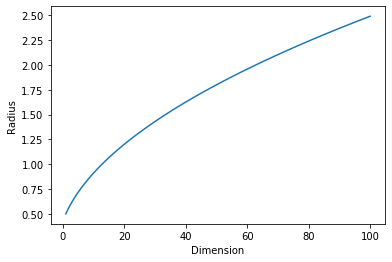

In [16]:
# plot r for a d-dimension hypersphere with a volume of 1
plt.plot(range(1,101), [r_hypervolume(i) for i in range(1,101)])
plt.xlabel('Dimension')
plt.ylabel('Radius')

Q3: Nearest Neighbors: Assume we have a unit hypercube centered at (0.5,⋯,0.5). Generate n=10000 uniformly random points in d dimensions, in the range (0,1) in each dimension. Find the ratio of the nearest and farthest point from the center of the space. Also store the actual distance of the nearest dn and farthest df points from the center. Plot these value for d=1,⋯,100.

In [17]:
import numpy as np
ratio = []
near = []
far = []
def get_distance(p):
    return math.sqrt(sum([(i-0.5)**2 for i in p]))

for d in range(1, 101):
    points = [np.random.rand(d) for _ in range(10000)]
    distance = [get_distance(p) for p in points]
    nearest = min(distance)
    fathest = max(distance)
    near.append(nearest)
    far.append(fathest)
    ratio.append(nearest/fathest)

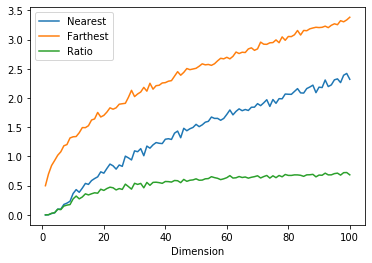

In [18]:
plt.plot(range(1,101), near, label='Nearest')
plt.plot(range(1,101), far, label = 'Farthest')
plt.plot(range(1,101), ratio, label= 'Ratio')
plt.xlabel('Dimension')
plt.legend()

Q4: Fraction of Volume: Assume we have a hypercube of edge length l=2 centered at the origin (0,0,⋯,0). Generate n=10,000 points uniformly at random for increasing dimensionality d=1,⋯,100. Now answer the following questions:

Plot the fraction of points that lie inside the largest hypersphere that can be inscribed inside the hypercube with increasing d. After how many dimensions does the fraction go to essentially zero? Plot the fraction of points in the thin shell of width ϵ=0.01 inside the hypercube (i.e., the difference between the outer hypercube and inner hypercube, or the thin shell along the boundaries). What is the trend that you see? After how many dimensions does the fraction of volume in the thin shell go to 100% (use binary search or increase the dimensionality in steps of 10 to answer this. You may use maximum dimensions of up to 2000, and you may use a threshold of 0.0001 to count the volume as essentially being 1 in the shell, i.e., a volume of 0.9999 can be taken to be equal to 1 for finding the smallest dimension at which this happens).

In [19]:
def get_distance1(p):
    return math.sqrt(sum([i**2 for i in p]))

def ratio_epsilon(eps1 = 0, eps2 = 1):
    frac = []
    for d in range(1, 101):
        points = [np.random.rand(d) for _ in range(10000)]
        distance = [get_distance1(p) for p in points]
        frac.append(sum([i>eps1 and i<eps2 for i in distance])/10000)
    return frac

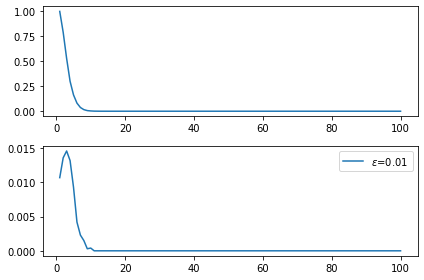

In [20]:
frac1 = ratio_epsilon()
frac2 = ratio_epsilon(0.99, 1)
fig, ax = plt.subplots(2,1)
ax[0].plot(range(1,101), frac1, label='Entire sphere')
ax[1].plot(range(1,101), frac2, label='$\epsilon$=0.01')
plt.legend()
plt.tight_layout()

Obervations: The fraction monotonically decreases to zero for the hypersphere, while the fraction increases and then decreases for  𝜖 =0.01

In [21]:
# the dimension have 0
d = frac1.index(0.00)+1
print('The fraction goes to essentially zero from {} and after.'.format(d))

The fraction goes to essentially zero from 15 and after.


In [22]:
def get_d(eps = 0.01, threshold=0.0001):
    d = 1
    while(True):
        if 1-(1-eps/1)**d < (1-threshold):
            d = d + 10
        else:
            print(d)
            break
        

In [23]:
# print the dimension
get_d(0.01, 0.0001)

921


Q5: Diagonals in High Dimensions

Your goal is the compute the empirical probability mass function (EPMF) for the random variable X that represents the angle (in degrees) between any two diagonals in high dimensions.

Assume that there are d primary dimensions (the standard axes in cartesian coordinates), with each of them ranging from -1 to 1. There are 2d additional half-diagonals in this space, one for each corner of the d-dimensional hypercube.

Write a script that randomly generates n=100000 pairs of half-diagonals in the d-dimensional hypercube, and computes the angle between them (in degrees).

Plot the EPMF for three different values of d, as follows d=10,100,1000. What is the min, max, value range, mean and variance of X for each value of d?

What would you have expected to have happened analytically? In other words, derive formulas for what should happen to angle between half-diagonals as d→∞. Does the EPMF conform to this trend? Explain why? or why not?

What is the expected number of occurrences of a given angle θ between two half-diagonals, as a function of d (the dimensionality) and n (the sample size)?

In [24]:
# define script to generate pairs
def generate_half_dig_pairs(d, n=100000):
    '''
    input: n->number of pairs, d->dimension
    output: list of tuples, in which each tuple is a pair of points
    '''
    return [(np.random.choice([-1,1], d), np.random.choice([-1,1], d)) for _ in range(n)]

In [25]:
def get_angle(p1, p2):
    d_p1 = math.sqrt(sum([i**2 for i in p1]))
    d_p2 = math.sqrt(sum([i**2 for i in p2]))
    d_p1p2 = sum([p1[i]*p2[i] for i in range(len(p1))])
    return np.arccos(d_p1p2/(d_p1*d_p2))/math.pi*180

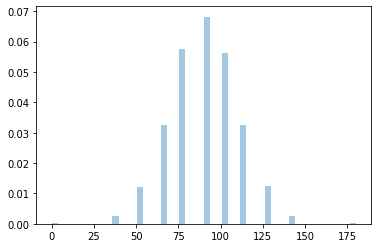

In [26]:
# plot EPMF for d=10
import seaborn as sns
d10 = generate_half_dig_pairs(10)
angle_list = [get_angle(i[0], i[1]) for i in d10]
sns.distplot(angle_list, norm_hist=True, kde=False)

In [27]:
# print min, max range, mean, variance for d=10
def print_summary(angle_list):
    '''
    input: a list
    outpur: min, max, range, mean, var
    '''
    print('min: {:.2f},\nmax: {:.2f},\nrange: {:.2f},\nmean: {:.2f},\nvariance: {:.2f}.'.format(
             np.min(angle_list),
             np.max(angle_list), 
             np.max(angle_list)-np.min(angle_list),
             np.mean(angle_list),
             np.var(angle_list)))

In [28]:
print_summary(angle_list)

min: 0.00,
max: 180.00,
range: 180.00,
mean: 89.99,
variance: 375.82.


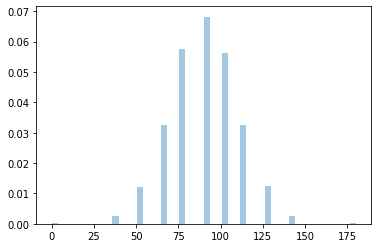

In [29]:
# plot EPMF for d=100 
d100 = generate_half_dig_pairs(100)
d100_angle_list = [get_angle(i[0], i[1]) for i in d100]
sns.distplot(angle_list, norm_hist=True, kde=False)

In [30]:
# print min, max range, mean, variance for d=100
print_summary(d100_angle_list)

min: 66.42,
max: 116.10,
range: 49.68,
mean: 90.02,
variance: 32.87.


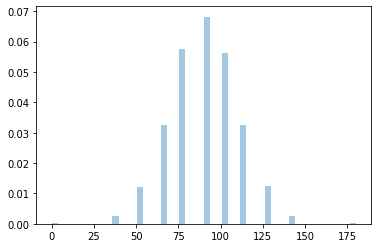

In [31]:
# plot EPMF for d=1000
d1000 = generate_half_dig_pairs(1000)
d1000_angle_list = [get_angle(i[0], i[1]) for i in d1000]
sns.distplot(angle_list, norm_hist=True, kde=False)

In [32]:
print_summary(d1000_angle_list)

min: 82.30,
max: 97.82,
range: 15.52,
mean: 90.00,
variance: 3.30.


For a given pair of half-diagnols,  cos𝜃  =  ∑(𝑖∗𝑗)/𝑑  for a d-dimension space. The  ∑(𝑖∗𝑗)  denotes the sum of values at each axises for the two points, and i, j are from choices of -1 and 1, with  𝑑→∞ ,  cos𝜃→0 , such that  𝜃→90∘ . The PMF confirm this, as we can see the mean keeps 90.00, while range and variance decreases monotonously.

Q: What is the expected number of occurrences of a given angle θ between two half-diagonals, as a function of d (the dimensionality) and n (the sample size)?

In [33]:
# the distribution can be approximated with a normal distribition of
# mean = 90, var = 3.3*1000
mean = 90
var = 3.3*1000
from scipy.stats import norm
def gauss(x, mean, std):
    return math.exp((-1/2)*((x-mean)/std)**2)/(std*math.sqrt(2*math.pi))
def get_expected(theta, n, d):
    prop = gauss(theta, 90, math.sqrt(var/d))
    occur = prop*n
    return(round(occur, 4))
    

In [34]:
# print occurence for 89, 10000, 100
get_expected(90, 10000, 100)

694.4694

### Exercise 3.1.1 Compute the Jaccard similarities of each pair of the following
### three sets: {1, 2, 3, 4}, {2, 3, 5, 7}, and {2, 4, 6}.

In [35]:
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len (set1 | set2)

In [36]:
x1 = {1, 2, 3, 4}
x2 = {2, 3, 5, 7}
x3 = {2, 4, 6}

In [37]:
jaccard_similarity(x1, x2)

0.3333333333333333

In [38]:
jaccard_similarity(x2, x3) 

0.16666666666666666

In [39]:
jaccard_similarity(x1, x3) 

0.4

### Exercise 3.2.1 What are the first ten 3-shingles in the first sentence of Section 3.2?

In [40]:
text_str = 'The most effective way to represent documents as sets, for the purpose of identifying lexically similar documents \
is to construct from the document the set of short strings that appear within it.'
out = []
for i in range(10):
    substr = text_str[i : i + 3]
    out.append(substr)
print(out)

['The', 'he ', 'e m', ' mo', 'mos', 'ost', 'st ', 't e', ' ef', 'eff']


### Exercise 3.3.3

In [41]:
df = pd.DataFrame({'Element':range(6), 'S1':[0,0,1,0,0,1], \
                   'S2':[1,1,0,0,0,0], 'S3':[0,0,0,1,1,0], \
                   'S4':[1,0,1,0,1,0]})

In [42]:
df['h1'] = [(2*i+1)%6 for i in range(6)]
df['h2'] = [(3*i+2)%6 for i in range(6)]
df['h3'] = [(5*i+2)%6 for i in range(6)]

In [43]:
# Compute the minhash signature for each column.
df

,Element,S1,S2,S3,S4,h1,h2,h3
0,0,0,1,0,1,1,2,2
1,1,0,1,0,0,3,5,1
2,2,1,0,0,1,5,2,0
3,3,0,0,1,0,1,5,5
4,4,0,0,1,1,3,2,4
5,5,1,0,0,0,5,5,3


As shown in above data frame, the sets of **h1** and **h2** are different from the Elements, so they are not true permutations, while **h3** has the same elements as the Element while in a different order, so **h3** is a **true** permutation.  

In [44]:
# calculate the signature matrix
# initialite the provided values
h_matrix = df[['h1', 'h2', 'h3']].values
s_matrix = df[['S1','S2','S3','S4']].values

In [45]:
def cal_sig(s_matrix, h_matrix):
    sig_matrix = 888*np.ones([h_matrix.shape[1], s_matrix.shape[1]])
    for i in range(s_matrix.shape[0]):
        for j in range(s_matrix.shape[1]):
            if s_matrix[i][j]==1:
                for k in range(h_matrix.shape[1]):
                    if h_matrix[i][k] < sig_matrix[k][j]:
                        sig_matrix[k][j] = h_matrix[i][k]
    return sig_matrix

In [46]:
# run a test on the textbook example
test1 = np.array([[1,0,0,1],[0,0,1,0],[0,1,0,1],[1,0,1,1],[0,0,1,0]])
test2 = np.array([[1,1],[2,4],[3,2],[4,0],[0,3]])
cal_sig(test1, test2)

array([[1., 3., 0., 1.],
       [0., 2., 0., 0.]])

In [47]:
# calculate the signature matrix for the problem
sig_result = cal_sig(s_matrix, h_matrix)

In [48]:
sig_result

array([[5., 1., 1., 1.],
       [2., 2., 2., 2.],
       [0., 1., 4., 0.]])

In [49]:
def cal_sim(a, b):
    return sum(a==b)/len(a)

In [50]:
# Print out the true jaccard similarity and the ones from signature matrix
from sklearn.metrics import jaccard_score
print('The true jaccard similarity between S1 and S2 is {:.3f},\n\
The calculated similarity is: {:.3f}.\n'.format(jaccard_score(df.S1, df.S2), \
                                                cal_sim(sig_result[:,0], sig_result[:,1])))

print('The true jaccard similarity between S1 and S3 is {:.3f},\n\
The calculated similarity is: {:.3f}.\n'.format(jaccard_score(df.S1, df.S3), \
                                                cal_sim(sig_result[:,0], sig_result[:,2])))

print('The true jaccard similarity between S1 and S4 is {:.3f},\n\
The calculated similarity is: {:.3f}.\n'.format(jaccard_score(df.S1, df.S4), \
                                                cal_sim(sig_result[:,0], sig_result[:,3])))

print('The true jaccard similarity between S2 and S3 is {:.3f},\n\
The calculated similarity is: {:.3f}.\n'.format(jaccard_score(df.S2, df.S3), \
                                                cal_sim(sig_result[:,1], sig_result[:,2])))

print('The true jaccard similarity between S2 and S4 is {:.3f},\n\
The calculated similarity is: {:.3f}.\n'.format(jaccard_score(df.S2, df.S4), \
                                                cal_sim(sig_result[:,1], sig_result[:,3])))

print('The true jaccard similarity between S3 and S4 is {:.3f},\n\
The calculated similarity is: {:.3f}.'.format(jaccard_score(df.S3, df.S4), \
                                                cal_sim(sig_result[:,2], sig_result[:,3])))

The true jaccard similarity between S1 and S2 is 0.000,
The calculated similarity is: 0.333.

The true jaccard similarity between S1 and S3 is 0.000,
The calculated similarity is: 0.333.

The true jaccard similarity between S1 and S4 is 0.250,
The calculated similarity is: 0.667.

The true jaccard similarity between S2 and S3 is 0.000,
The calculated similarity is: 0.667.

The true jaccard similarity between S2 and S4 is 0.250,
The calculated similarity is: 0.667.

The true jaccard similarity between S3 and S4 is 0.250,
The calculated similarity is: 0.667.


### Exercise 3.4.1

In [51]:
def s_curve(s, r, b):
    return 1-(1-s**r)**b

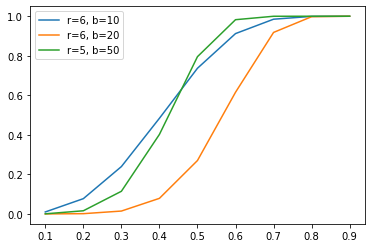

In [52]:
import matplotlib.pyplot as plt
import numpy as np

s = np.linspace(0.1, 0.9, 9)
y1 = [s_curve(i, 3, 10) for i in s]
y2 = [s_curve(i, 6, 20) for i in s]
y3 = [s_curve(i, 5, 50) for i in s]
plt.plot(s, y1, label = 'r=6, b=10')
plt.plot(s, y2, label = 'r=6, b=20')
plt.plot(s, y3, label = 'r=5, b=50')
plt.legend()